In [2]:
%matplotlib inline

import os
import sys
import copy
import time
import pickle
from array import array
import numpy as np
np.seterr(over='ignore')
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy import optimize
from scipy.interpolate import RegularGridInterpolator
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ipywidgets import interact, interactive, fixed, FloatSlider

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

# VarClump functions
sys.path.append('../../lib/')
from utils import *
from graph import *
from points_generation import *
from initial_guess import *
from variational import *
from gmr import *

#target_path = "/Users/martin/Repositories/VarClump-docs/paper/"
target_path = '/Users/martin/Dropbox/Aplicaciones/ShareLaTeX/VarClump/'

### Loading the residual stats

In [3]:
elm_list = pickle.load( open('../../results/exp02_alpha1_orion.pkl', 'rb') ) 
r_stats_orion = [elm.residual_stats for elm in elm_list]

elm_list = pickle.load( open('../../results/exp02_alpha1_ngc3265.pkl', 'rb') ) 
r_stats_ngc3265 = [elm.residual_stats for elm in elm_list]

elm_list = pickle.load( open('../../results/exp02_alpha1_antennae.pkl', 'rb') ) 
r_stats_antennae = [elm.residual_stats for elm in elm_list]

## RMS

In [14]:
alphas = np.array([elm.a for elm in elm_list])
rms_orion = stat_extractor(r_stats_orion, 'rms')
rms_ngc3265 = stat_extractor(r_stats_ngc3265, 'rms')
rms_antennae = stat_extractor(r_stats_antennae, 'rms')

y_vars = [rms_orion, rms_ngc3265, rms_antennae]
labels = ['Orion', 'NGC3265','Antennae' ]

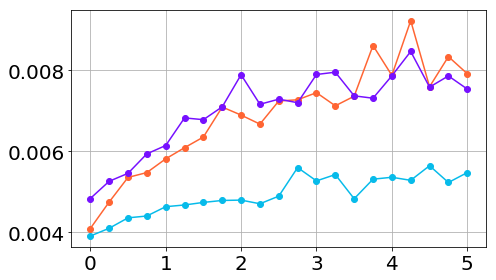

In [15]:
stat_plots(alphas, y_vars, labels=labels, xlabel='', ylabel='', legend=False, save_name=target_path+"exp02_rms.eps")

## Flux addition

In [16]:
fadd_orion = stat_extractor(r_stats_orion, 'flux_addition')
fadd_ngc3265 = stat_extractor(r_stats_ngc3265, 'flux_addition')
fadd_antennae = stat_extractor(r_stats_antennae, 'flux_addition')

y_vars = [fadd_orion, fadd_ngc3265, fadd_antennae]

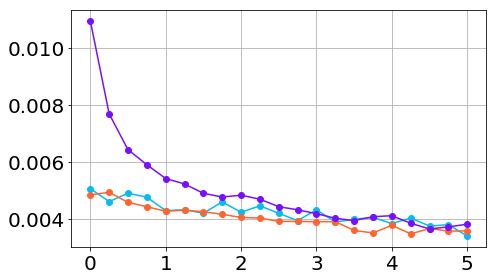

In [17]:
stat_plots(alphas, y_vars, labels=labels, xlabel='', ylabel='', legend=False, save_name=target_path+"exp02_fadd.eps")

## Flux lost

In [18]:
flost_orion = stat_extractor(r_stats_orion, 'flux_lost')
flost_ngc3265 = stat_extractor(r_stats_ngc3265, 'flux_lost')
flost_antennae = stat_extractor(r_stats_antennae, 'flux_lost')

y_vars = [flost_orion, flost_ngc3265, flost_antennae]

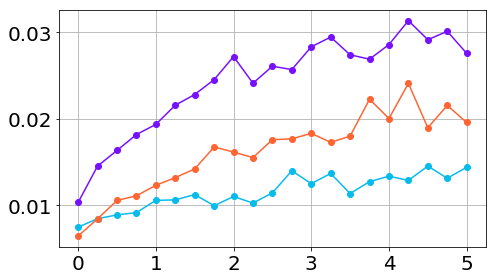

In [19]:
stat_plots(alphas, y_vars, labels=labels, xlabel='', ylabel='', legend=False, 
           save_name=target_path+"exp02_flost.eps")

## Sharpness

In [20]:
sharp_orion = stat_extractor(r_stats_orion, 'sharpness')
sharp_ngc3265 = stat_extractor(r_stats_ngc3265, 'sharpness')
sharp_antennae = stat_extractor(r_stats_antennae, 'sharpness')

y_vars = [sharp_orion, sharp_ngc3265, sharp_antennae]

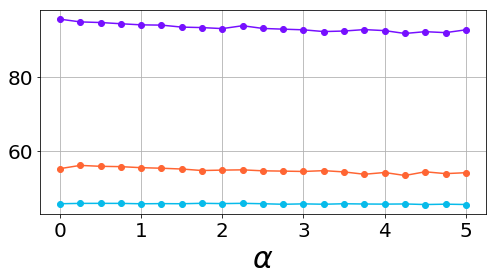

In [21]:
stat_plots(alphas, y_vars, labels=labels, xlabel=r'$\alpha$', ylabel='', legend=False, 
           save_name=target_path+"exp02_sharp.eps")